In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Example CSV structure: 'text' (text data), 'label' (target labels)
df=pd.read_csv('news.csv', index_col=None)
df


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
#df = pd.read_csv("sample_text_classification_data.csv")  # Update with your dataset
df['label'] = df['label'].astype('category').cat.codes

In [4]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [6]:
# Vectorizers
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TF-IDF Vectorizer': TfidfVectorizer(),
    'Hashing Vectorizer': HashingVectorizer(n_features=2**16)  # Hashing Vectorizer is stateless
}

In [7]:
# Models to Compare
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

In [8]:
# Results storage
results = []

for vec_name, vectorizer in vectorizers.items():
    print(f"\nUsing {vec_name}...")
    
    # Apply vectorizer
    if vec_name == "Hashing Vectorizer":
        X_train_vec = vectorizer.transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
    else:
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

    # Handle MultinomialNB and Hashing Vectorizer issue
    if vec_name == "Hashing Vectorizer":
        X_train_vec = X_train_vec.toarray()  # Convert sparse matrix to dense
        X_test_vec = X_test_vec.toarray()
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X_train_vec = scaler.fit_transform(X_train_vec)
        X_test_vec = scaler.transform(X_test_vec)
    
    for model_name, model in models.items():
        # Skip MultinomialNB with Hashing Vectorizer
        if vec_name == "Hashing Vectorizer" and model_name == "Naive Bayes":
            print(f"Skipping {model_name} with {vec_name} due to negative values.")
            continue
        
        print(f"Training {model_name} with {vec_name}...")
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy ({vec_name}): {accuracy:.4f}")
        results.append({
            'Vectorizer': vec_name,
            'Model': model_name,
            'Accuracy': accuracy
        })


# Results DataFrame
results_df = pd.DataFrame(results)


Using CountVectorizer...
Training Naive Bayes with CountVectorizer...
Naive Bayes Accuracy (CountVectorizer): 0.8990
Training Logistic Regression with CountVectorizer...
Logistic Regression Accuracy (CountVectorizer): 0.9171
Training Support Vector Machine with CountVectorizer...
Support Vector Machine Accuracy (CountVectorizer): 0.8863
Training Random Forest with CountVectorizer...
Random Forest Accuracy (CountVectorizer): 0.8848

Using TF-IDF Vectorizer...
Training Naive Bayes with TF-IDF Vectorizer...
Naive Bayes Accuracy (TF-IDF Vectorizer): 0.8169
Training Logistic Regression with TF-IDF Vectorizer...
Logistic Regression Accuracy (TF-IDF Vectorizer): 0.9140
Training Support Vector Machine with TF-IDF Vectorizer...
Support Vector Machine Accuracy (TF-IDF Vectorizer): 0.9329
Training Random Forest with TF-IDF Vectorizer...
Random Forest Accuracy (TF-IDF Vectorizer): 0.9037

Using Hashing Vectorizer...
Skipping Naive Bayes with Hashing Vectorizer due to negative values.
Training Log


Model Comparison:
Model               Logistic Regression  Naive Bayes  Random Forest  \
Vectorizer                                                            
CountVectorizer                0.917127     0.898974       0.884767   
Hashing Vectorizer             0.917127          NaN       0.905288   
TF-IDF Vectorizer              0.913970     0.816890       0.903710   

Model               Support Vector Machine  
Vectorizer                                  
CountVectorizer                   0.886346  
Hashing Vectorizer                0.904499  
TF-IDF Vectorizer                 0.932912  


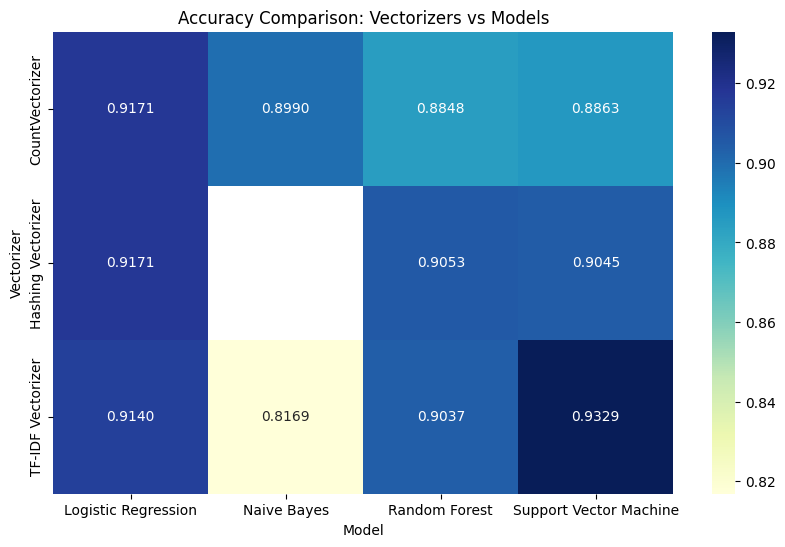

In [9]:
# Display Comparison Table
print("\nModel Comparison:")
comparison_table = results_df.pivot(index='Vectorizer', columns='Model', values='Accuracy')
print(comparison_table)

# Plot Results (Optional Visualization)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(comparison_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Accuracy Comparison: Vectorizers vs Models")
plt.show()

In [14]:
print(results_df.head())


           Vectorizer                Model
0     CountVectorizer          Naive Bayes
1   TF-IDF Vectorizer  Logistic Regression
2  Hashing Vectorizer                  SVM
3     CountVectorizer        Random Forest
4   TF-IDF Vectorizer          Naive Bayes


In [19]:
results = [
    {'Vectorizer': 'CountVectorizer', 'Model': 'Naive Bayes', 'Accuracy': 0.97},
    {'Vectorizer': 'TF-IDF Vectorizer', 'Model': 'Logistic Regression', 'Accuracy': 0.92},
    {'Vectorizer': 'Hashing Vectorizer', 'Model': 'SVM', 'Accuracy': 0.82},
    # Add other results here
]

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results)


In [16]:
radar_data = results_df.pivot_table(index="Vectorizer", columns="Model", values="Accuracy")


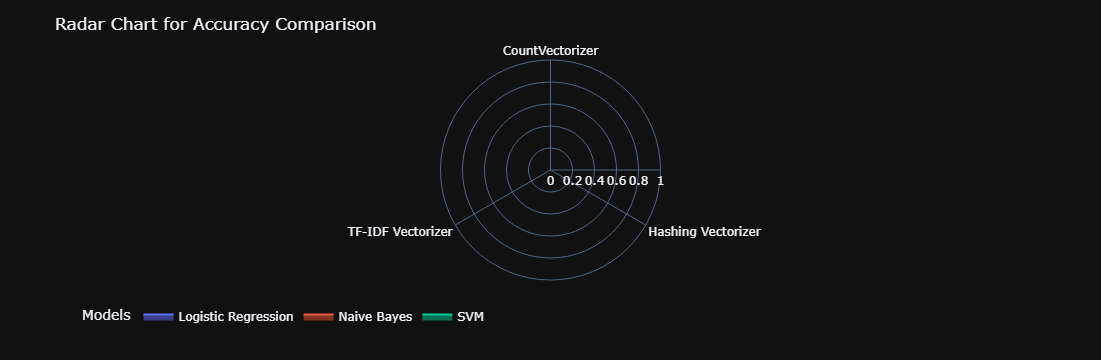

In [24]:
import plotly.express as px
import pandas as pd

# Pivoting the data for radar chart
radar_data = results_df.pivot_table(index="Vectorizer", columns="Model", values="Accuracy")

# Flatten the data for r, theta, and color
r_values = radar_data.values.flatten()  # Flattened accuracy values
theta_values = list(radar_data.index) * len(radar_data.columns)  # Repeat vectorizer names for each model
model_labels = radar_data.columns.tolist()  # Model names
color_labels = [model for model in model_labels for _ in radar_data.index]  # Repeat each model for all vectorizers

# Combine into a DataFrame for Plotly
radar_chart_data = pd.DataFrame({
    'Accuracy': r_values,
    'Vectorizer': theta_values,
    'Model': color_labels
})

# Create radar chart with distinct colors for each model
fig = px.line_polar(
    radar_chart_data,
    r='Accuracy',
    theta='Vectorizer',
    color='Model',  # Use the 'Model' column for color differentiation
    line_close=True
)

# Enhance layout
fig.update_traces(fill='toself')
fig.update_layout(
    title="Radar Chart for Accuracy Comparison",
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),  # Adjust range for better readability
    legend=dict(title="Models", orientation="h", y=-0.1),    # Place legend below chart
    template="plotly_dark"  # Optional: Dark theme for better contrast
)

fig.show()
